## <div align="center">Lab Sheet 02 K-means Clustering  of Drivers Data </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Load the drivers data from a csv file and plot a scatter plot to show the data relationship

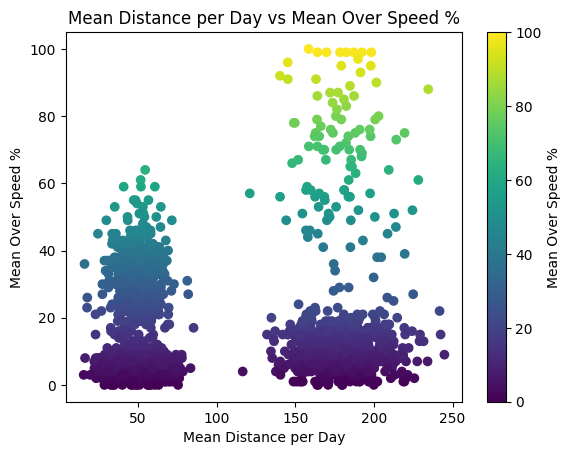

In [2]:
df = pd.read_csv("driver-data.csv")
df.head()

plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=df['mean_over_speed_perc'])
plt.colorbar(label='Mean Over Speed %') 
plt.title('Mean Distance per Day vs Mean Over Speed %')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed %')
plt.show()

#### The inference we can make from the above scatter plot is, when the average distance driven between 30 to 70 miles, the driver tend to overspeed 50% of the time, another place where the driver overspeed is when they drive an average of 140 - 220 miles per day, then around 20% of the driver over speed.

### Apply K-means clustering  algorithm with K=3, 4, 5 and 6.

##### Extract the dataframe into a feature to use that with Kmeans algorithm.

In [3]:
features = df[['mean_dist_day','mean_over_speed_perc']]
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


#### Helper method to plot the cluster and score for the parameter passed into this method, we will use this to run multiple cluster K number and output different scatter plot.

In [20]:
#helper method ot display chart and score
def plot_kmeans_clusters_and_score(features, cluster_grouping, num_clusters,x_values, y_values):
       
    # Compute the silhouette score
    silhouette_avg = silhouette_score(features, cluster_grouping)
    print(f"Silhouette Score: {silhouette_avg:.2f}")

    # Scatter plot
    plt.scatter(x_values, y_values, c=cluster_grouping, cmap='viridis')
    plt.title(f'KMeans Clustering (k={num_clusters}) of Mean Distance per Day vs Mean Over Speed %')
    plt.xlabel('Mean Distance per Day')
    plt.ylabel('Mean Over Speed %')
    plt.show()        

Silhouette Score: 0.82


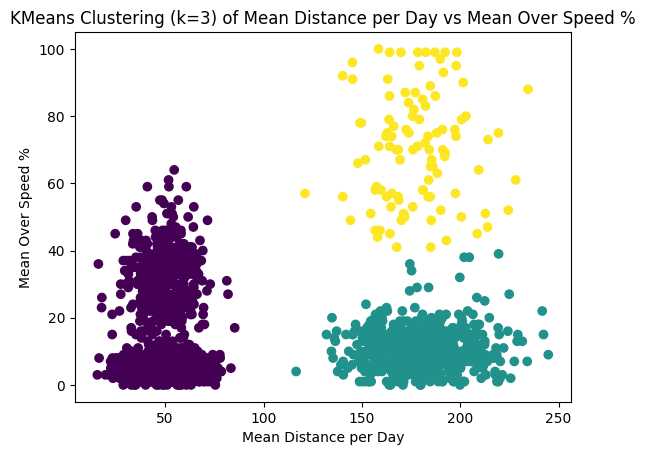

In [22]:
n_k = 3
kmeans = KMeans(n_clusters=n_k,n_init=10,random_state=42)
df['cluster'] = kmeans.fit_predict(features)

plot_kmeans_clusters_and_score(features,df['cluster'],
                               n_k,df['mean_dist_day'],
                               df['mean_over_speed_perc'])

Silhouette Score: 0.59


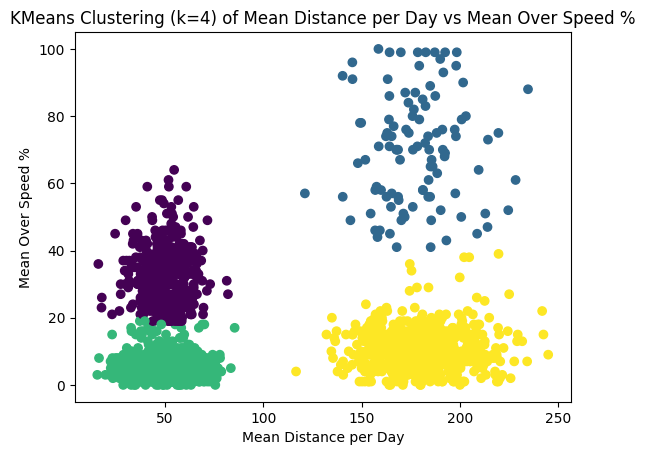

In [23]:
n_k = 4
kmeans = KMeans(n_clusters=n_k,n_init=10,random_state=42)
df['cluster'] = kmeans.fit_predict(features)

plot_kmeans_clusters_and_score(features,df['cluster'],n_k,
                               df['mean_dist_day'], 
                               df['mean_over_speed_perc'])

Silhouette Score: 0.51


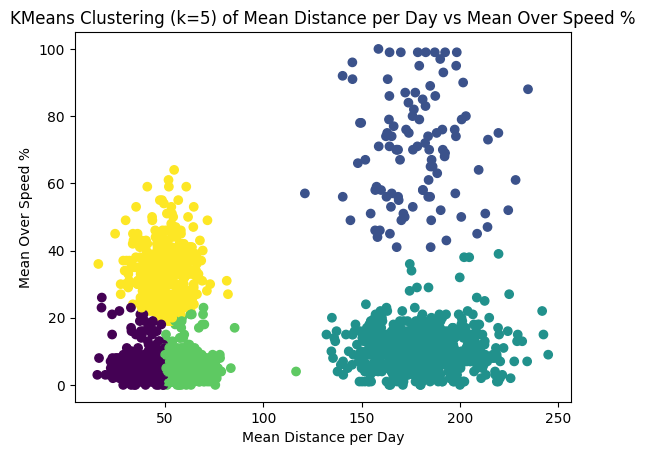

In [24]:
n_k = 5
kmeans = KMeans(n_clusters=n_k,n_init=10,random_state=42)
df['cluster'] = kmeans.fit_predict(features)

plot_kmeans_clusters_and_score(features,df['cluster'],n_k,
                               df['mean_dist_day'], 
                               df['mean_over_speed_perc'])

Silhouette Score: 0.49


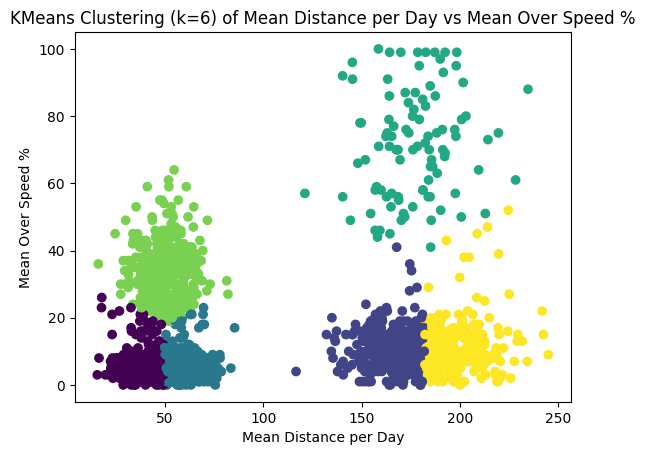

In [25]:
n_k = 6
kmeans = KMeans(n_clusters=n_k,n_init=10,random_state=42)
df['cluster'] = kmeans.fit_predict(features)

plot_kmeans_clusters_and_score(features,df['cluster'],n_k,
                               df['mean_dist_day'], 
                               df['mean_over_speed_perc'])

#### From the above chart, we used kMeans cluster with 3, 4 , 5 and 6. We also used Silhouette Score to see how well the clusters are seperated, the closer to 1 is better and less then 0 means the data inside the cluster is not closely related.

#### from the above chart we can see the cluster with K =3 fairs well as it groups the data that are closer to each other, the Silhouette score is also 0.82. 

#### as we increase the K numbers, it breaks the cluster into multiple groups, the Silhouette Score also reduce a lot as we increase the cluster to 4.